In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use(['fast'])
plt.style.use(['seaborn-poster'])
print(plt.style.available)

DATA_FOLDER = "/data/cubes/"
DATA_PATH = os.path.abspath(os.getcwd()) + DATA_FOLDER

['fast', 'seaborn-bright', 'seaborn-notebook', 'dark_background', 'grayscale', 'seaborn-pastel', 'Solarize_Light2', 'seaborn-talk', 'bmh', 'fivethirtyeight', 'seaborn-colorblind', 'seaborn-deep', 'ggplot', '_classic_test', 'seaborn-dark', 'seaborn-whitegrid', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-poster', 'seaborn-white', 'seaborn-paper', 'seaborn-muted', 'seaborn-ticks', 'seaborn', 'classic']


In [2]:
# Iterate over files and find csv files that have allocation of cubes for each participant
dfs = []

for filename in os.listdir(DATA_PATH):
    if filename.endswith(".csv"): 
        participant_id = int(re.search(r'\d+', filename).group())
        temp = pd.read_csv(DATA_PATH + filename)
        temp["scene"] = temp["scene"].str[-1:]
        temp["scene"] = temp["scene"].astype('int')
        temp["participant"] = participant_id
        nvc = "B"
        if int(participant_id) % 2 == 0:
            nvc = "A"
    
        temp["NVC"] = nvc
        dfs.append(temp)


raw_data = pd.concat(dfs, axis=0, ignore_index=True)

In [3]:
raw_data.head()

,scene,robot_a,robot_b,participant,NVC
0,0,0,1,1,B
1,1,1,1,1,B
2,2,3,2,1,B
3,3,3,3,1,B
4,4,3,3,1,B


In [4]:
odd_participants_data = raw_data[raw_data["participant"] % 2 != 0]
odd_participants_data = odd_participants_data[odd_participants_data["scene"] >= 1]
even_participants_data = raw_data[raw_data["participant"] % 2 == 0]
even_participants_data = even_participants_data[even_participants_data["scene"] >= 1]

In [5]:
odd_participants_data.head()

,scene,robot_a,robot_b,participant,NVC
1,1,1,1,1,B
2,2,3,2,1,B
3,3,3,3,1,B
4,4,3,3,1,B
11,1,1,0,11,B


In [6]:
odd_cubes_per_participant = odd_participants_data.groupby("participant").sum()
even_cubes_per_participant = even_participants_data.groupby("participant").sum()

odd_cubes_per_participant = odd_cubes_per_participant.drop(columns=['scene'])
even_cubes_per_participant = even_cubes_per_participant.drop(columns=['scene'])

odd_cubes_per_participant['total_cubes'] = odd_cubes_per_participant['robot_a'] + odd_cubes_per_participant['robot_b']
even_cubes_per_participant['total_cubes'] = even_cubes_per_participant['robot_a'] + even_cubes_per_participant['robot_b']

odd_cubes_per_participant

,robot_a,robot_b,total_cubes
participant,,,
1,10,9,19
3,12,11,23
5,10,13,23
7,7,17,24
9,12,12,24
11,4,7,11
13,13,10,23
15,13,14,27
17,7,10,17


In [7]:
odd_cubes_per_participant.sum()

robot_a         88
robot_b        103
total_cubes    191
dtype: int64

# Participants which had robotB as NVC

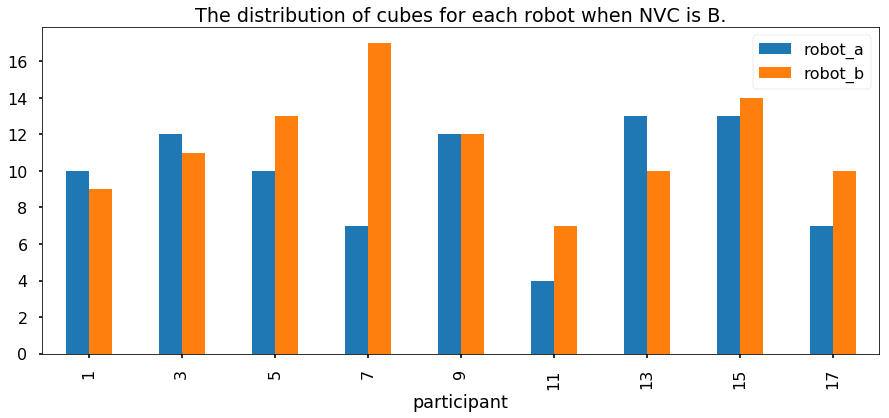

In [8]:
odd_cubes_per_participant_plot_data = odd_cubes_per_participant.drop(columns=['total_cubes'])
odd_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot when NVC is B.")

# Participants which had robotA as NVC

In [9]:
even_cubes_per_participant

,robot_a,robot_b,total_cubes
participant,,,
2,8,8,16
4,7,9,16
6,1,17,18
8,10,12,22
10,8,15,23
12,9,3,12
14,4,4,8
16,13,13,26


In [10]:
even_cubes_per_participant.sum()

robot_a         60
robot_b         81
total_cubes    141
dtype: int64

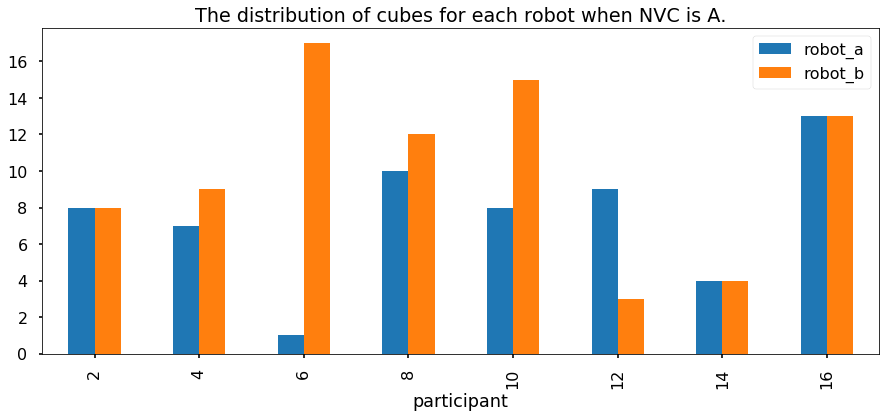

In [11]:
even_cubes_per_participant_plot_data = even_cubes_per_participant.drop(columns=['total_cubes'])
even_cubes_per_participant_plot_data.plot(kind = 'bar', figsize=(15,6), title="The distribution of cubes for each robot when NVC is A.")

# NVC-B group by scene

In [12]:
odd_participants_by_scene = odd_participants_data.groupby("scene").sum().drop(columns=['participant'])
odd_participants_by_scene

,robot_a,robot_b
scene,,
1,16,18
2,19,26
3,29,26
4,24,33


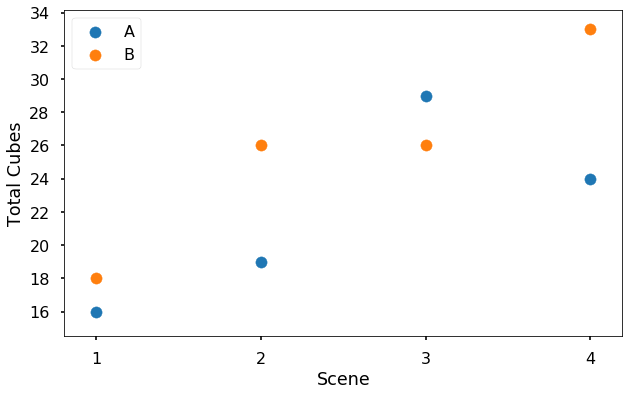

In [67]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(0,35,2))
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_a"], label="A")
plt.scatter(odd_participants_by_scene.index, odd_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

# NVC-A group by scene

In [14]:
even_participants_by_scene = even_participants_data.groupby("scene").sum().drop(columns=['participant'])
even_participants_by_scene

,robot_a,robot_b
scene,,
1,11,6
2,13,23
3,19,22
4,17,30


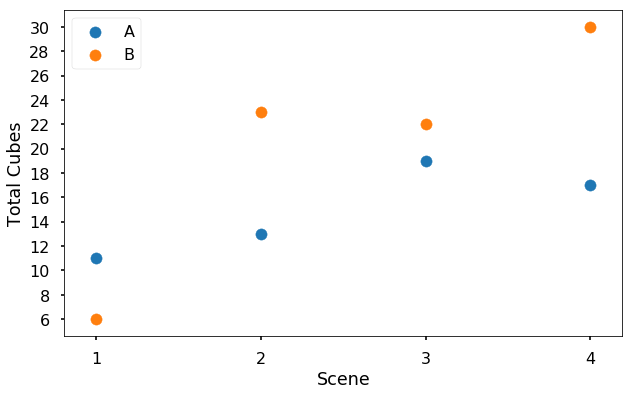

In [68]:
plt.figure(figsize=(10,6))
plt.xticks(range(1,5))
plt.yticks(range(0,35,2))
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_a"], label="A")
plt.scatter(even_participants_by_scene.index, even_participants_by_scene["robot_b"], label="B")
plt.xlabel('Scene')
plt.ylabel('Total Cubes')
plt.legend()
plt.show()

Text(0,0.5,'total cubes')

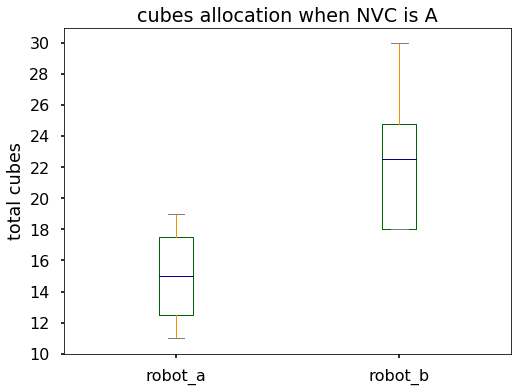

In [65]:
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
ax = even_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6), yticks=range(10,32,2),
                                    title = "cubes allocation when NVC is A")
ax.set_ylabel("total cubes")

Text(0,0.5,'total cubes ')

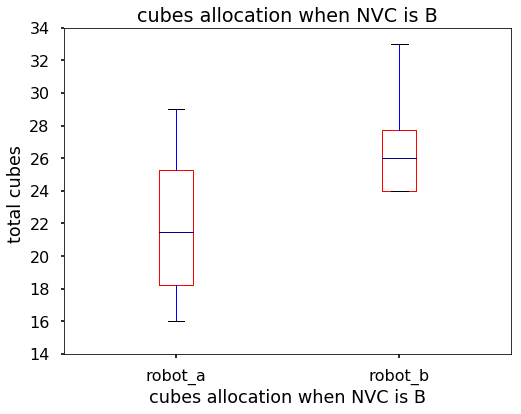

In [64]:
color = {'boxes': 'Red', 'whiskers': 'Blue','medians': 'DarkBlue', 'caps': 'Black'}
ax = odd_participants_by_scene.plot(kind = 'box', color = color, sym='', figsize=(8,6),yticks=range(14,36,2),
                                    title = "cubes allocation when NVC is B")
ax.set_xlabel("cubes allocation when NVC is B")
ax.set_ylabel("total cubes ")

In [73]:
odd_participants_data

,scene,robot_a,robot_b,participant,NVC
1,1,1,1,1,B
2,2,3,2,1,B
3,3,3,3,1,B
4,4,3,3,1,B
11,1,1,0,11,B
12,2,1,2,11,B
13,3,2,2,11,B
14,4,0,3,11,B
21,1,3,2,13,B
22,2,0,5,13,B
